# Phase 2 Review

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols 
import scipy as sp  
import scipy.stats as stats 
import seaborn as sns 
import matplotlib.pyplot as plt 
import math 
from scipy.stats import t as st

pd.set_option('display.max_columns', 100)

### Check Your Data … Quickly
The first thing you want to do when you get a new dataset, is to quickly to verify the contents with the .head() method.

In [2]:
df = pd.read_csv('movie_metadata.csv')
print(df.shape)
df.head()

(5043, 28)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [48]:
clean_df = df.dropna(how='any')

In [4]:
df = df.dropna(subset = ['gross'])

In [5]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4156.000000,4157.000000,4156.00000,4146.000000,4155.000000,4.159000e+03,4.159000e+03,4159.000000,4152.000000,4158.000000,3.891000e+03,4156.000000,4153.000000,4159.000000,4054.000000,4159.000000
mean,159.333013,109.535242,747.16001,723.764834,7344.085921,4.846841e+07,9.748653e+04,10882.029574,1.373555,312.829004,4.521028e+07,2003.267565,1888.046472,6.469897,2.105740,8730.617697
std,122.574779,22.693707,2946.34955,1810.821487,15050.541525,6.845299e+07,1.472604e+05,18517.280893,2.040875,399.464221,2.223895e+08,9.945465,4370.489706,1.052182,0.349726,20788.260808
min,1.000000,34.000000,0.00000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1920.000000,0.000000,1.600000,1.180000,0.000000
25%,70.000000,95.000000,10.00000,172.000000,698.000000,5.340988e+06,1.511700e+04,1736.500000,0.000000,93.000000,1.000000e+07,1999.000000,343.000000,5.900000,1.850000,0.000000
50%,130.000000,105.000000,57.00000,416.000000,1000.000000,2.551750e+07,4.639600e+04,3697.000000,1.000000,190.000000,2.400000e+07,2005.000000,650.000000,6.600000,2.350000,182.000000
75%,217.000000,119.000000,218.00000,675.500000,12000.000000,6.230944e+07,1.145815e+05,15561.500000,2.000000,374.000000,5.000000e+07,2010.000000,962.000000,7.200000,2.350000,10000.000000
max,813.000000,334.000000,23000.00000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.300000,16.000000,349000.000000


## Question 1

A Hollywood executive wants to know how much an R-rated movie released after 2000 will earn. The data above is a sample of some of the movies with that rating during that timeframe, as well as other movies. How would you go about answering her question? Talk through it theoretically and then do it in code.

What is the 95% confidence interval for a post-2000 R-rated movie's box office gross?

In [6]:
# talk through your answer here

#Steps  
#1) clean the data so it only displays r-rated movies after 2000 and thier gross.  
#2) Drop na values  
#3) Run fuction to calculate confidence interval for our subset 

In [7]:
# do it in code here

r = df[(df['title_year'] >= 2000.0) & (df['content_rating'] == 'R')]
#df = df.dropna(subset = ['gross']) 
 
q = .975


In [8]:
def conf_interval(sample, q):
    
    sample_size = len(sample) 
    x_hat = sample.mean() 
    
    #z = stats.norm.ppf(q) 
    t_score = stats.t.ppf(q, df=len(sample))
    stdev = sample.std()   
    
    moe = t_score * (stdev/math.sqrt(sample_size))  
    
    conf = (x_hat - moe, x_hat + moe) 
    return t_score, moe, conf  

In [9]:
# 95% confidence interval
t_score, margin_of_error, confidence_interval = conf_interval(r['gross'], q) 

print("\nWe are 95% confident that our gross for a post 2000s R-rated movie will be between these two numbers:")
print(confidence_interval)


We are 95% confident that our gross for a post 2000s R-rated movie will be between these two numbers:
(25471913.633454368, 29723508.600008667)


## Question 2a

Your ability to answer the first question has the executive excited and now she has many other questions about the types of movies being made and the differences in those movies budgets and gross amounts.

Read through the questions below and **determine what type of statistical test you should use** for each question and **write down the null and alternative hypothesis for those tests**.

- Is there a relationship between the number of Facebook likes for a cast and the box office gross of the movie?
- Do foreign films perform differently at the box office than non-foreign films?
- Of all movies created are 40% rated R?
- Is there a relationship between the language of a film and the content rating (G, PG, PG-13, R) of that film?
- Is there a relationship between the content rating of a film and its budget? 

In [10]:
#Is there a relationship between the number of Facebook likes for a cast and the box office gross of the movie?

#H0: b0 = 0 There no relationship between Facebook likes and gross
#HA: b0 != 0 There is a relationship.
#Test type: simple linear regression 


In [11]:
#Do foreign films perform differently at the box office than non-foreign films?

#H0: mu1 = mu2 There is no difference between domestic and foreign
#HA: mu1 != mu2 There is a relationship.
#Test type: difference of two means z-test, two sided z-test   

In [12]:
#Of all movies created are 40% rated R?

#H0: p = .4 There is no difference between domestic and foreign
#HA: p != .4 There is a relationship.
#Test type: one sample proportions z-test

In [13]:
#Is there a relationship between the language of a film and the content rating (G, PG, PG-13, R) of that film?

#H0: b0 = 0 There is no relationship between language and rating 
#HA: b0 != 0 There is a relationship.
#Test type: simple linear regression 

In [14]:
#Is there a relationship between the content rating of a film and its budget?

#H0: b0 = 0 There is no relationship between content rating and budget 
#HA: b0 != 0 There is a relationship.
#Test type: simple linear regression 

## Question 2b

Calculate the answer for the second question:

- Do foreign films perform differently at the box office than non-foreign films?

In [15]:
domestic = df[df.country == 'USA']
domesticg = domestic.gross
foreign = df[df.country != 'USA']  
foreigng = foreign.gross

In [16]:
def sample_variance(sample):
    sample_mean = np.mean(sample)
    return np.sum((sample - sample_mean) **2)/ (len(sample) -1)

In [17]:
def pooled_variance(sample1, sample2):
    n_1, n_2 = len(sample1), len(sample2)
    var_1, var_2 = sample_variance(sample1), sample_variance(sample2)
    return ((n_1-1) * var_1 + (n_2-1)* var_2)/((n_1 + n_2)-2)

In [18]:
def twosample_tstatistic(expr, ctrl):
    exp_mean, ctrl_mean = np.mean(expr), np.mean(ctrl)
    pool_var = pooled_variance(expr, ctrl)
    n_e, n_c = len(expr), len(ctrl)
    num = exp_mean - ctrl_mean
    denom = np.sqrt(pool_var * ((1/n_e)+(1/n_c)))
    z_value = num / denom
    return z_value

In [19]:
twosample_tstatistic(foreigng, domesticg)

-12.098302287742106

In [20]:
def diff_two_means(df, threshold):
    df_usa = df[df.country == 'USA']['gross']
    df_foreing = df[~(df.country=='USA')]['gross']
    n1 = len(df_usa)
    n2 = len(df_foreing)
    x_1 = df_usa.mean()
    x_2 = df_foreing.mean()
    s1 = df_usa.std()
    s2 = df_foreing.std()
    alpha = (1-(threshold)/100)/2
    df = len(df)-1
    t_crit = stats.t.ppf(1 - alpha, df=df)   # critical value 
    numer = (x_1 - x_2) - 0
    denum = math.sqrt((s1**2/n1)+(s2**2/n2))
    delta_mu = numer/denum
    #p = 1 - scs.t.cdf(delta_mu, df=df) 
    print(delta_mu)
    if delta_mu > t_crit or delta_mu < - t_crit :
        return print( """
        We reject the null Hypotesys because based one statistical test two groups sample means difference 
        is = {}, which gets in rejection area defined by critical values {} and -{}.
        """.format(round(delta_mu,2),round(t_crit,2),round(t_crit,2)))
    else:
        return print( """
        There is not enough evidence to reject the null Hypotesys because based one statistical test
        two groups sample means difference is = {}, which does not get in rejection area defined by critical values {} and -{}.
        """.format(round(delta_mu,2),round(t_crit,2),round(t_crit,2)))

In [21]:
diff_two_means(df, 95)

14.911721173786235

        We reject the null Hypotesys because based one statistical test two groups sample means difference 
        is = 14.91, which gets in rejection area defined by critical values 1.96 and -1.96.
        


## Question 3

Now that you have answered all of those questions, the executive wants you to create a model that predicts the money a movie will make if it is released next year in the US. She wants to use this to evaluate different scripts and then decide which one has the largest revenue potential. 

Below is a list of potential features you could use in the model. Create a new frame containing only those variables.

Would you use all of these features in the model?

Identify which features you might drop and why.

*Remember you want to be able to use this model to predict the box office gross of a film **before** anyone has seen it.*

- **budget**: The amount of money spent to make the movie
- **title_year**: The year the movie first came out in the box office
- **years_old**: How long has it been since the movie was released
- **genre**: Each movie is assigned one genre category like action, horror, comedy
- **avg_user_rating**: This rating is taken from Rotten tomatoes, and is the average rating given to the movie by the audience
- **actor_1_facebook_likes**: The number of likes that the most popular actor in the movie has
- **total_cast_facebook_likes**: The sum of likes for the three most popular actors in the movie
- **language**: the original spoken language of the film


In [22]:
df.keys()

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [ ]:
# clean_df['title_year'] = clean_df['title_year'].map(lambda x:int(x)) 
# clean_df['years_old'] = clean_df['title_year'].map(lambda x:2021-x)

In [47]:
df['years_old'] = 2021 - df['years_old']

In [54]:
# your answer here
from statsmodels.formula.api import ols

movie_model = ols(formula='gross~budget+title_year+imdb_score+actor_1_facebook_likes+cast_total_facebook_likes+language+years_old', data=clean_df).fit() 
movie_model.summary() #alpha can be changed by setting alpha = in the paranthesis here

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     22.18
Date:                Thu, 21 Jan 2021   Prob (F-statistic):          8.49e-136
Time:                        10:26:21   Log-Likelihood:                -72811.
No. Observations:                3756   AIC:                         1.457e+05
Df Residuals:                    3717   BIC:                         1.459e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                 -6.384e+08   2.23e+08     -2.859      0.004   -1.08e+09   -2.01e+08
language[T.Arabic]        -3.846e+07   7.82e+07     -0.492      0.623   -1.92e+08    1.15e+08
language[T.Aramaic]       -3.937e+07   7.82e+07     -0.504      0.614   -1.93e+08    1.14e+08
language[T.Bosnian]        6.159e+05   7.82e+07      0.008      0.994   -1.53e+08    1.54e+08
language[T.Cantonese]     -3.328e+07   5.12e+07     -0.650      0.515   -1.34e+08     6.7e+07
language[T.Czech]          -4.56e+07   7.82e+07     -0.584      0.560   -1.99e+08    1.08e+08
language[T.Danish]        -5.074e+07   5.83e+07     -0.871      0.384   -1.65e+08    6.35e+07
language[T.Dari]          -3.627e+07   6.38e+07     -0.568      0.570   -1.61e+08    8.88e+07
language[T.Dutch]         -4.317e+07   5.83e+07     -0.741      0.459   -1.57e+08     7.1e+07
language[T.English]        1.435e+07   4.51e+07      0.318      0.751   -7.42e+07    1.03e+08
language[T.Filipino]      -2.817e+07   7.82e+07     -0.360      0.719   -1.81e+08    1.25e+08
language[T.French]        -3.681e+07   4.64e+07     -0.793      0.428   -1.28e+08    5.42e+07
language[T.German]        -4.149e+07   4.94e+07     -0.839      0.401   -1.38e+08    5.54e+07
language[T.Hebrew]        -4.938e+07   7.82e+07     -0.632      0.528   -2.03e+08    1.04e+08
language[T.Hindi]         -4.709e+07   5.34e+07     -0.882      0.378   -1.52e+08    5.76e+07
language[T.Hungarian]     -1.555e+08   7.94e+07     -1.959      0.050   -3.11e+08    1.03e+05
language[T.Indonesian]    -4.952e+07   6.38e+07     -0.776      0.438   -1.75e+08    7.56e+07
language[T.Italian]       -3.122e+07   5.12e+07     -0.610      0.542   -1.32e+08    6.91e+07
language[T.Japanese]      -7.084e+07   4.96e+07     -1.429      0.153   -1.68e+08    2.63e+07
language[T.Kazakh]        -2.553e+07   7.82e+07     -0.327      0.744   -1.79e+08    1.28e+08
language[T.Korean]         -2.02e+08   5.64e+07     -3.579      0.000   -3.13e+08   -9.13e+07
language[T.Mandarin]      -3.219e+07    4.8e+07     -0.670      0.503   -1.26e+08     6.2e+07
language[T.Maya]           5.052e+05   7.82e+07      0.006      0.995   -1.53e+08    1.54e+08
language[T.Mongolian]     -3.624e+07   7.82e+07     -0.464      0.643   -1.89e+08    1.17e+08
language[T.None]          -5.745e+07   7.82e+07     -0.735      0.462   -2.11e+08    9.58e+07
language[T.Norwegian]     -3.943e+07   5.53e+07     -0.714      0.476   -1.48e+08    6.89e+07
language[T.Persian]       -5.094e+07   5.83e+07     -0.874      0.382   -1.65e+08    6.33e+07
language[T.Portuguese]     -4.55e+07   5.34e+07     -0.852      0.394    -1.5e+08    5.92e+07
language[T.Romanian]      -4.907e+07   7.82e+07     -0.628      0.530   -2.02e+08    1.04e+08
language[T.Russian]       -2.721e+07   7.82e+07     -0.348      0.728    -1

In [101]:
matrix = df.corr().abs() 
threshold = .95

In [95]:

def highly_corr(matrix, threshold):

    upper_tri = matrix.where(np.triu(np.ones(matrix.shape),k=1).astype(np.bool))
#Note that Correlation matrix will be mirror image about the diagonal and all the diagonal elements will be 1. So, It does not matter that we select the upper triangular or lower triangular part of the correlation matrix but we should not include the diagonal elements. So we are selecting the upper traingular. 
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
    print(); print(to_drop)
    
    

In [96]:
highly_corr(matrix, threshold)


['years_old']


In [102]:
matrix.unstack()

num_critic_for_reviews  num_critic_for_reviews     1.000000
                        duration                   0.236475
                        director_facebook_likes    0.179827
                        actor_3_facebook_likes     0.259195
                        actor_1_facebook_likes     0.180616
                                                     ...   
years_old               actor_2_facebook_likes     0.107676
                        imdb_score                 0.131504
                        aspect_ratio               0.223514
                        movie_facebook_likes       0.282373
                        years_old                  1.000000
Length: 289, dtype: float64

In [51]:
import matplotlib.pyplot as plt 
import numpy as np 

In [26]:
import seaborn as sns
plt.style.use('seaborn')
sns.set(style="white")

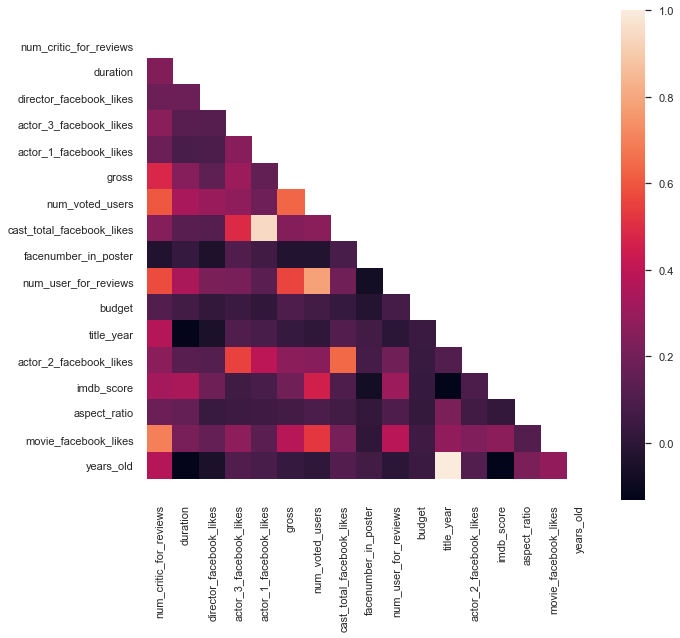

In [56]:
# Set up  matplotlib figure (might have to play around with the 
# figsize if your labels aren't so legible and you don't want
# to mess with the labels using matplotlib)
f, ax = plt.subplots(figsize=(10, 9))
# Create an upper triangular matrix to use to get rid of duplicate/
# useless values
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
# plot the heatmap
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr(), mask=mask, square=True)
# fix for mpl bug that cuts off top/bottom of seaborn viz
# credit: https://github.com/mwaskom/seaborn/issues/1773 SalMac86's post
b, t = plt.ylim() # discover the values for bottom and top
b += .5 # Add 0.5 to the bottom
t -= .5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

## Question 4a

Create the following variables:

- `years_old`: The number of years since the film was released.
- Dummy categories for each of the following ratings:
    - `G`
    - `PG`
    - `R`
    
Once you have those variables, create a summary output for the following OLS model:

`gross~cast_total_facebook_likes+budget+years_old+G+PG+R`

In [28]:
df["years_old"] = 2021 - df["title_year"]



## Question 4b

Below is the summary output you should have gotten above. Identify any key takeaways from it.
- How ‘good’ is this model?
- Which features help to explain the variance in the target variable? 
    - Which do not? 


<img src="ols_summary.png" style="withd:300px;">

In [ ]:
# your answer here
#  R - squared value: 0.079
# Adj. R -squared value: 0.075
# Poor model because there is littel variation within the model,
# seeing that our data points spread out more
# All the features with the exception G rating help us explain the variance
# in the target variable, based on our p-value
# G rated value is the only value we can see from here that plays no effect on the
# gross of the film.

In [29]:
# your answer here
df.keys()


Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'years_old'],
      dtype='object')

## Question 5

**Bayes Theorem**

An advertising executive is studying television viewing habits of married men and women during prime time hours. Based on the past viewing records he has determined that during prime time wives are watching television 60% of the time. It has also been determined that when the wife is watching television, 40% of the time the husband is also watching. When the wife is not watching the television, 30% of the time the husband is watching the television. Find the probability that if the husband is watching the television, the wife is also watching the television.

In [30]:
P_a = 0.60 #P(A) The probability that wife is watching television 
P_na =  0.40 #P(A') The probability the wife is not watching
P_b_given_a = 0.40 #P(B|A) The probability that the husband is watching given the wife is watching
P_b_na = .30 #P(B|A') The probability that husband is watching given that the wife is not watching 
P_b = (P_b_given_a*P_a) + (P_b_na*P_na) #P(B) The probability the the husband is watching. 
P_nb = .64 #P(B) The probability the the husband is not watching
P_b_given_a = 0.40 #P(B|A) The probability that the husband is watching given the wife is watching
P_b_na = .30 #P(B|A') The probability that husband is watching given that the wife is not watching 

P_a_given_b = (P_b_given_a*P_a)/P_b  #P(A|B) The probability that wife (that the wife is watching) given husband (that the husband is watching) 
P_a_given_b 

0.6666666666666666

## Question 6

Explain what a Type I error is and how it relates to the significance level when doing a statistical test. 

In [31]:
#A type 1 error is also known as a false positive and occurs when a researcher incorrectly rejects a true null hypothesis. This means that your report that your findings are significant when in fact they have occurred by chance.

#The probability of making a type I error is represented by your alpha level (α), which is the p-value below which you reject the null hypothesis. A p-value of 0.05 indicates that you are willing to accept a 5% chance that you are wrong when you reject the null hypothesis.

#You can reduce your risk of committing a type I error by using a lower value for p. For example, a p-value of 0.01 would mean there is a 1% chance of committing a Type I error.

#However, using a lower value for alpha means that you will be less likely to detect a true difference if one really exists (thus risking a type II error).